In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scanpy as sc
import os
import scvi
import sys 

import os
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import patches as mpatches
import numpy as np
from scipy.sparse import csr_matrix
from scipy.stats import ks_2samp
import anndata
import scanpy
import string
import seaborn as sns
import h5py
import tifffile
import fs
from fs import open_fs
from matplotlib_scalebar.scalebar import ScaleBar
from tqdm import tqdm

mpl.rcParams.update(mpl.rcParamsDefault) #Reset rcParams to default
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']  # Colors in this style


from matplotlib.pyplot import rc_context


# Plotting style function (run this before plotting the final figure)
def set_plotting_style():
    plt.style.use('seaborn-paper')
    plt.rc('axes', labelsize=12)
    plt.rc('axes', titlesize=12)
    plt.rc('xtick', labelsize=10)
    plt.rc('ytick', labelsize=10)
    plt.rc('legend', fontsize=10)
    plt.rc('text.latex', preamble=r'\usepackage{sfmath}')
    plt.rc('xtick.major', pad=2)
    plt.rc('ytick.major', pad=2)
    plt.rc('mathtext', fontset='stixsans', sf='sansserif')
    plt.rc('figure', figsize=[10,9])
    plt.rc('svg', fonttype='none')

C:\Users\joshu\miniconda3\envs\cxg\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\joshu\miniconda3\envs\cxg\lib\site-packages\scvi\__init__.py:31: DeprecationWarning: scvi is deprecated, please uninstall scvi via `pip uninstall scvi` and install the new scvi-tools package at github.com/YosefLab/scvi-tools
  warnings.warn(deprecation_msg, DeprecationWarning)


In [2]:
adata = sc.read_h5ad('C:/Users/joshu/Desktop/all_h5ads/Biopsy_RNA_Final.h5ad')
list_clusters_coarse = adata.obs["220414 JH COARSE"].unique()
list_clusters_fine = adata.obs["220414 JH FINE"].unique()
adata.obs["220414 JH FINE"]

AAACCTGAGACAATAC-1_1                   CD4T naive
AAACCTGAGACCGGAT-1_1                   Plasma IgA
AAACCTGAGGCTCTTA-1_1                  CD4T memory
AAACCTGAGTGCAAGC-1_1                      CD4T RM
AAACCTGCAAAGTGCG-1_1    CD8T naive and regulatory
                                  ...            
TTTGTCACATCCCACT-1_8                   Plasma IgA
TTTGTCACATCCTTGC-1_8                      CD8T RM
TTTGTCAGTCGTGGCT-1_8                   Plasma IgG
TTTGTCATCAGAGACG-1_8                    Cycling T
TTTGTCATCATGCATG-1_8                   Plasma IgM
Name: 220414 JH FINE, Length: 50845, dtype: category
Categories (54, object): ['B NOS', 'B cycling', 'B memory', 'B naive', ..., 'Plasma IgA', 'Plasma IgG', 'Plasma IgM', 'Plasma cells NOS']

In [5]:
adata_bioB= adata[adata.obs['220414 JH FINE'].isin(['B cycling', 'B memory', 'B naive'])]
adata_bioPlasma= adata[adata.obs['220414 JH FINE'].isin(['Plasma IgA', 'Plasma IgG', 'Plasma IgM'])]
adata_bioCD4T= adata[adata.obs['220414 JH FINE'].isin(['CD4T fh-like', 'CD4T memory', 'CD4T naive', 'CD4T reg', 'CD4T RM'])]
adata_bioCD8T= adata[adata.obs['220414 JH FINE'].isin(['CD8T GZMB','CD8T GZMK','CD8T naive', 'CD8T RM'])]
adata_bioMNP = adata[adata.obs['220414 JH FINE'].isin(['Myeloid activated DC', 'Myeloid cDC1', 'Myeloid cDC2', 'Myeloid macrophage', 'Myeloid pDC'])]
adata_bioCD8TGD= adata[adata.obs['220414 JH FINE'].isin(['CD8T GZMB','CD8T GZMK','CD8T naive', 'CD8T RM', 'GD T cells'])]
adata_GZMBTRM = adata[adata.obs['220414 JH FINE'].isin(['CD8T GZMB', 'CD8T RM'])]


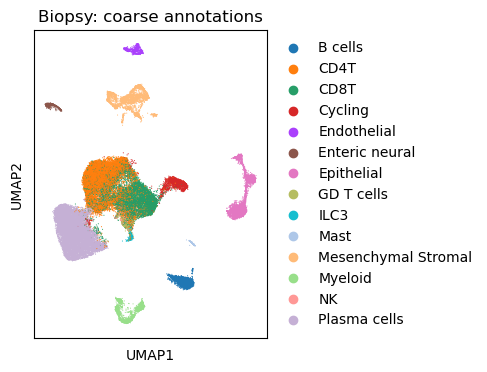

In [18]:
from matplotlib.pyplot import rc_context
with rc_context({'figure.figsize': (3, 4)}):
      sc.pl.umap(adata, color=['220414 JH COARSE'], title='Biopsy: coarse annotations',
                 save= 'UMAP biopsy coarse')

In [20]:
bdata = sc.read_h5ad('C:/Users/joshu/Desktop/all_h5ads/Blood_RNA_Final.h5ad')


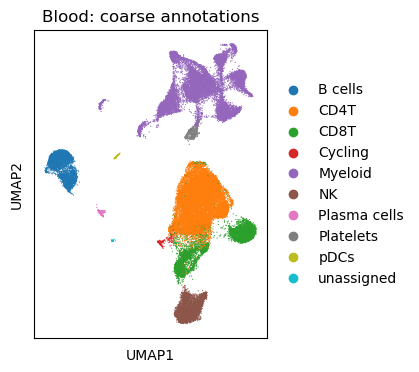

In [25]:
from matplotlib.pyplot import rc_context
with rc_context({'figure.figsize': (3, 4)}):
      sc.pl.umap(bdata, color=['220414 JH COARSE'], title='Blood: coarse annotations',
               save= 'UMAP blood coarse')

# SPLIT UMAPS BY METADATA

In [4]:
adata = sc.read_h5ad('C:/Users/joshu/Desktop/all_h5ads/Biopsy_RNA_Final.h5ad')


['CPI_colitis', 'HC', 'UC']
Categories (3, object): ['CPI_colitis', 'HC', 'UC']

In [6]:
adata.obs["disease"].unique()

['CPI_colitis', 'HC', 'UC']
Categories (3, object): ['CPI_colitis', 'HC', 'UC']

In [7]:
adata.obs["cpi"].unique()

['combo', 'none', 'PD-1']
Categories (3, object): ['PD-1', 'combo', 'none']

In [8]:
adata.obs["suppression"].unique()

['steroid', 'none', 'TNF']
Categories (3, object): ['TNF', 'none', 'steroid']

In [25]:
CPIcolitis_data= adata[adata.obs['disease'].isin(['CPI_colitis'])]
HC_data= adata[adata.obs['disease'].isin(['HC'])]
UC_data= adata[adata.obs['disease'].isin(['UC'])]

noneC_data= adata[adata.obs['cpi'].isin(['none'])]
PD1_data= adata[adata.obs['cpi'].isin(['PD-1'])]
combo_data= adata[adata.obs['cpi'].isin(['combo'])]

noneS_data= adata[adata.obs['suppression'].isin(['none'])]
TNF_data= adata[adata.obs['suppression'].isin(['TNF'])]
steroid_data= adata[adata.obs['suppression'].isin(['steroid'])]


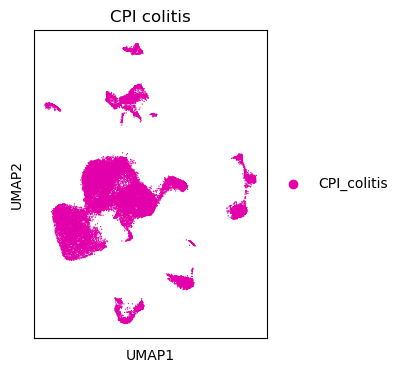

In [28]:
with rc_context({'figure.figsize': (3, 4)}):
      sc.pl.umap(CPIcolitis_data, color=['disease'], title='CPI colitis', 
                 palette={"HC":"#F9DA00","UC": "#55A0FB","CPI_colitis": "#E100A9"},
                 save= '_disease_CPI_colitis')

C:\Users\joshu\miniconda3\envs\cxg\lib\site-packages\anndata\compat\_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


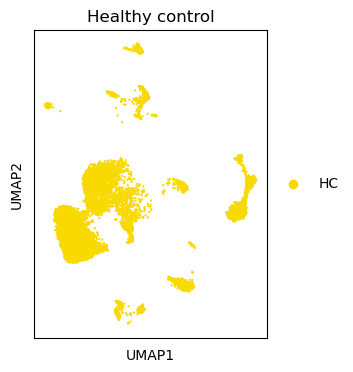

In [29]:
with rc_context({'figure.figsize': (3, 4)}):
      sc.pl.umap(HC_data, color=['disease'], title='Healthy control', 
                 palette={"HC":"#F9DA00","UC": "#55A0FB","CPI_colitis": "#E100A9"},
                 save= '_disease_hc')

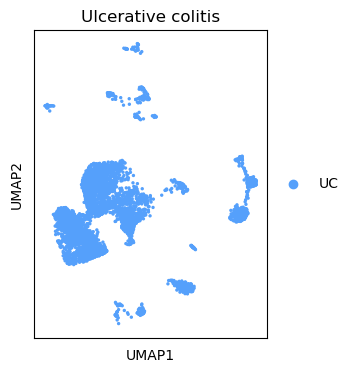

In [33]:
with rc_context({'figure.figsize': (3, 4)}):
      sc.pl.umap(UC_data, color=['disease'], title='Ulcerative colitis', 
                 palette={"HC":"#F9DA00","UC": "#55A0FB","CPI_colitis": "#E100A9"},
                 save= '_disease_uc')

C:\Users\joshu\miniconda3\envs\cxg\lib\site-packages\anndata\compat\_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


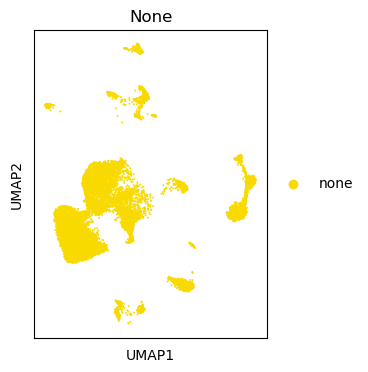

In [35]:
with rc_context({'figure.figsize': (3, 4)}):
      sc.pl.umap(noneC_data, color=['cpi'], title='None',
                 palette= {"combo":"#356CFF", "PD-1":"#31FF9D", "none": "#F9DA00"},
                 save= '_cpi_None')

C:\Users\joshu\miniconda3\envs\cxg\lib\site-packages\anndata\compat\_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


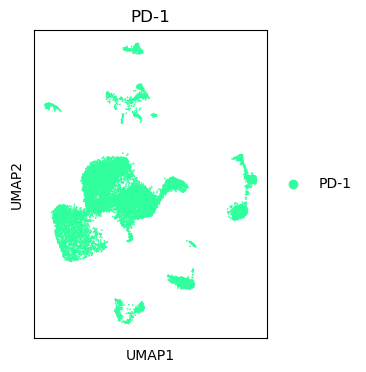

In [36]:
with rc_context({'figure.figsize': (3, 4)}):
      sc.pl.umap(PD1_data, color=['cpi'], title='PD-1',
                 palette= {"combo":"#356CFF", "PD-1":"#31FF9D", "none": "#F9DA00"},
                 save= '_cpi_pd1')

C:\Users\joshu\miniconda3\envs\cxg\lib\site-packages\anndata\compat\_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


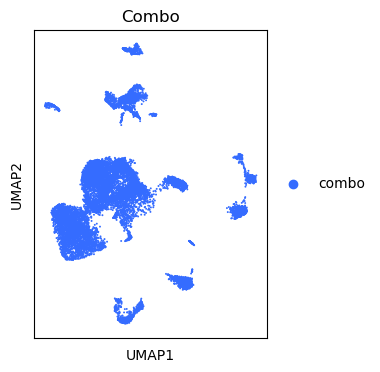

In [37]:
with rc_context({'figure.figsize': (3, 4)}):
      sc.pl.umap(combo_data, color=['cpi'], title='Combo',
                 palette= {"combo":"#356CFF", "PD-1":"#31FF9D", "none": "#F9DA00"},
                 save= '_cpi_combo')

C:\Users\joshu\miniconda3\envs\cxg\lib\site-packages\anndata\compat\_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


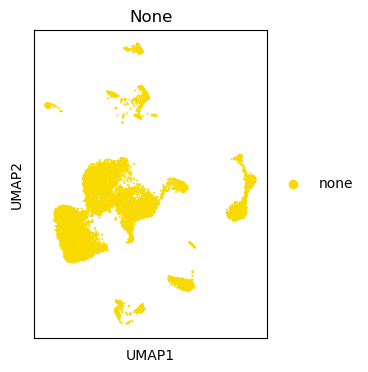

In [38]:
with rc_context({'figure.figsize': (3, 4)}):
      sc.pl.umap(noneS_data, color=['suppression'], title='None',
                  palette= {"none":"#F9DA00", "steroid":"#B588FF", 'TNF':"#CC3800"},
                 save= '_sup_None')

C:\Users\joshu\miniconda3\envs\cxg\lib\site-packages\anndata\compat\_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


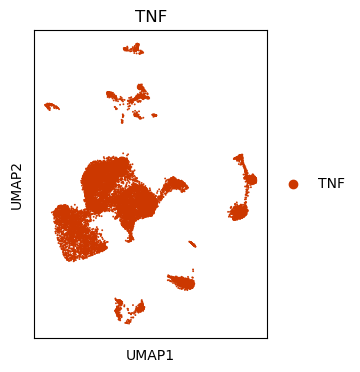

In [39]:
with rc_context({'figure.figsize': (3, 4)}):
      sc.pl.umap(TNF_data, color=['suppression'], title='TNF',
                  palette= {"none":"#F9DA00", "steroid":"#B588FF", 'TNF':"#CC3800"},
                 save= '_sup_TNF')

C:\Users\joshu\miniconda3\envs\cxg\lib\site-packages\anndata\compat\_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


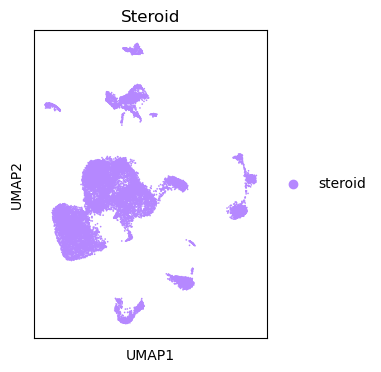

In [40]:
with rc_context({'figure.figsize': (3, 4)}):
      sc.pl.umap(steroid_data, color=['suppression'], title='Steroid',
                  palette= {"none":"#F9DA00", "steroid":"#B588FF", 'TNF':"#CC3800"},
                 save= '_sup_steroid')

In [2]:
adata = sc.read_h5ad('C:/Users/joshu/Desktop/all_h5ads/Blood_RNA_Final.h5ad')


In [3]:
adata.obs["disease"].unique()

['HC', 'CPI_colitis', 'UC']
Categories (3, object): ['CPI_colitis', 'HC', 'UC']

In [4]:
adata.obs["cpi"].unique()

['none', 'PD-1', 'combo']
Categories (3, object): ['PD-1', 'combo', 'none']

In [5]:
adata.obs["suppression"].unique()


['none', 'TNF', 'steroid']
Categories (3, object): ['TNF', 'none', 'steroid']

In [6]:
CPIcolitis_data= adata[adata.obs['disease'].isin(['CPI_colitis'])]
HC_data= adata[adata.obs['disease'].isin(['HC'])]
UC_data= adata[adata.obs['disease'].isin(['UC'])]

noneC_data= adata[adata.obs['cpi'].isin(['none'])]
PD1_data= adata[adata.obs['cpi'].isin(['PD-1'])]
combo_data= adata[adata.obs['cpi'].isin(['combo'])]

noneS_data= adata[adata.obs['suppression'].isin(['none'])]
TNF_data= adata[adata.obs['suppression'].isin(['TNF'])]
steroid_data= adata[adata.obs['suppression'].isin(['steroid'])]


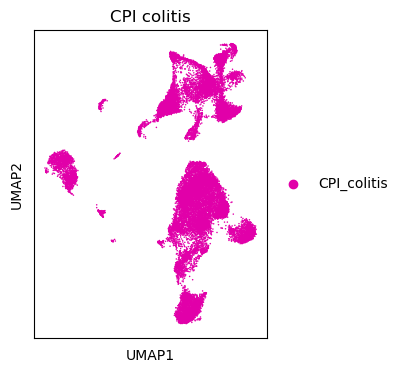

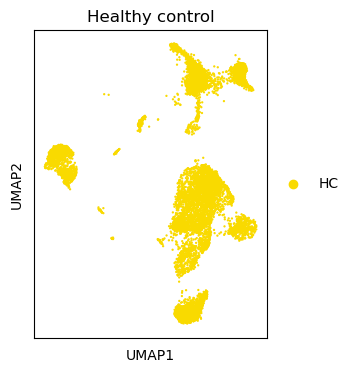

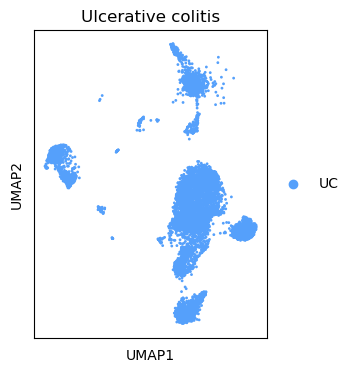

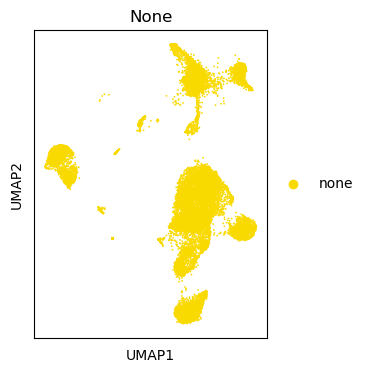

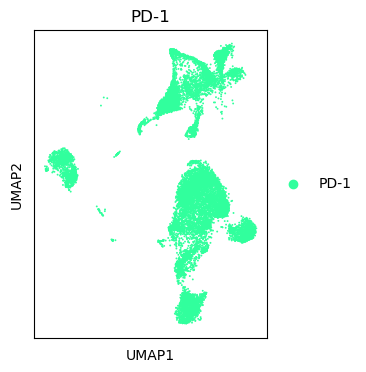

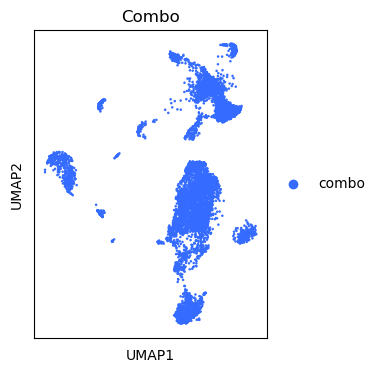

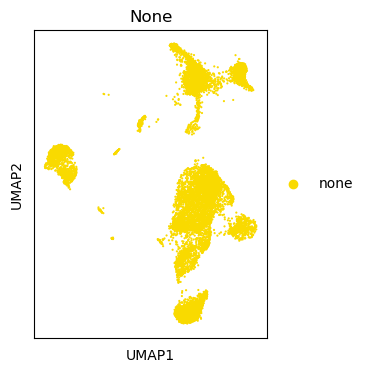

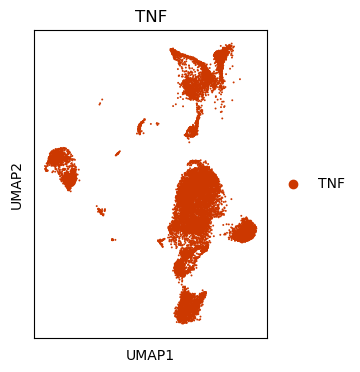

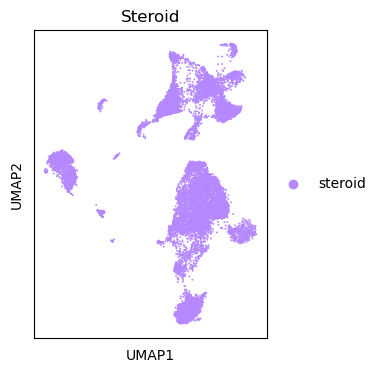

In [8]:
with rc_context({'figure.figsize': (3, 4)}):
      sc.pl.umap(CPIcolitis_data, color=['disease'], title='CPI colitis', 
                 palette={"HC":"#F9DA00","UC": "#55A0FB","CPI_colitis": "#E100A9"},
                 save= '_blood_disease_CPI_colitis')
        
with rc_context({'figure.figsize': (3, 4)}):
      sc.pl.umap(HC_data, color=['disease'], title='Healthy control', 
                 palette={"HC":"#F9DA00","UC": "#55A0FB","CPI_colitis": "#E100A9"},
                 save= '_blood_disease_hc')
        
with rc_context({'figure.figsize': (3, 4)}):
      sc.pl.umap(UC_data, color=['disease'], title='Ulcerative colitis', 
                 palette={"HC":"#F9DA00","UC": "#55A0FB","CPI_colitis": "#E100A9"},
                 save= '_blood_disease_uc')

#CPI
with rc_context({'figure.figsize': (3, 4)}):
      sc.pl.umap(noneC_data, color=['cpi'], title='None',
                 palette= {"combo":"#356CFF", "PD-1":"#31FF9D", "none": "#F9DA00"},
                 save= '_blood_cpi_None')

with rc_context({'figure.figsize': (3, 4)}):
      sc.pl.umap(PD1_data, color=['cpi'], title='PD-1',
                 palette= {"combo":"#356CFF", "PD-1":"#31FF9D", "none": "#F9DA00"},
                 save= '_blood_cpi_pd1')
        
with rc_context({'figure.figsize': (3, 4)}):
      sc.pl.umap(combo_data, color=['cpi'], title='Combo',
                 palette= {"combo":"#356CFF", "PD-1":"#31FF9D", "none": "#F9DA00"},
                 save= '_blood_cpi_combo')
        
with rc_context({'figure.figsize': (3, 4)}):
      sc.pl.umap(noneS_data, color=['suppression'], title='None',
                  palette= {"none":"#F9DA00", "steroid":"#B588FF", 'TNF':"#CC3800"},
                 save= '_blood_sup_None')
        
with rc_context({'figure.figsize': (3, 4)}):
      sc.pl.umap(TNF_data, color=['suppression'], title='TNF',
                  palette= {"none":"#F9DA00", "steroid":"#B588FF", 'TNF':"#CC3800"},
                 save= '_blood_sup_TNF')
        
with rc_context({'figure.figsize': (3, 4)}):
      sc.pl.umap(steroid_data, color=['suppression'], title='Steroid',
                  palette= {"none":"#F9DA00", "steroid":"#B588FF", 'TNF':"#CC3800"},
                 save= '_blood_sup_steroid')
        
